# Linear Reg


In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create a Spark session
spark = SparkSession.builder.appName("LinearRegressionExample").getOrCreate()

# Load your regression-compatible dataset
# Replace 'path_to_your_dataset' with the actual path to your dataset
data = spark.read.csv('seeds.csv', header=True, inferSchema=True)

# Prepare the data
feature_columns = data.columns[:-1]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)

# Rename the target column to 'label'
data = data.withColumnRenamed('V7', 'label')

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

# Create the LinearRegression model
lr = LinearRegression(featuresCol='features', labelCol='label')

# Train the model
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) =", rmse)

Root Mean Squared Error (RMSE) = 0.1156320660317889


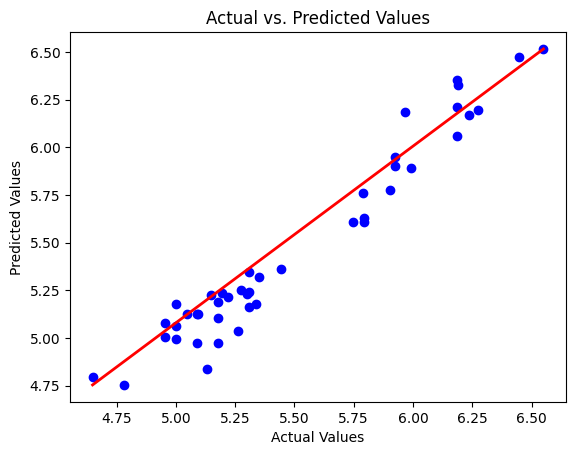

In [7]:
# Collect the data for plotting
actual_values = np.array(test_data.select('label').collect())
predicted_values = np.array(predictions.select('prediction').collect())
# Plot the data points and regression line
plt.scatter(actual_values, predicted_values, color='blue')
plt.plot([min(actual_values), max(actual_values)], [min(predicted_values), max(predicted_values)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Logistic Regression


In [17]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [18]:
spark = SparkSession.builder.appName("LogisticRegressionExample").getOrCreate()


In [19]:
# Load the Titanic dataset (assuming it's in CSV format)
titanic_data = spark.read.csv("titanic.csv", header=True, inferSchema=True)


In [20]:
feature_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
target_column = "Survived"
#Selecting only the feature and target columns, removing the missing values
data = titanic_data.select(feature_columns + [target_column]).na.drop()


In [21]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

In [22]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=12345)


In [23]:
logistic_regression = LogisticRegression(featuresCol="features", labelCol=target_column)


In [24]:
logistic_model = logistic_regression.fit(train_data)


In [26]:
predictions = logistic_model.transform(test_data)


In [28]:
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
accuracy = evaluator.evaluate(predictions)

print("Accuracy:", accuracy)


Accuracy: 0.7223057644110275


In [34]:
from pyspark.sql.functions import col, expr, when
from pyspark.sql.types import DoubleType

tp = predictions.filter((col("prediction") == 1) & (col(target_column) == 1)).count()
fp = predictions.filter((col("prediction") == 1) & (col(target_column) == 0)).count()
tn = predictions.filter((col("prediction") == 0) & (col(target_column) == 0)).count()
fn = predictions.filter((col("prediction") == 0) & (col(target_column) == 1)).count()

# Calculate precision, recall, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Close the Spark session
spark.stop()

Precision: 0.6176470588235294
Recall: 0.3684210526315789
F1-Score: 0.4615384615384615
